# Module 8.  Assignment 1. Machine Learning. Digits dataset library sklearn.


This assignment, we have split it into two main parts. First of all, we have analyzed every model individually and after that, we have done a comparative analysis between them.

Before we start to analyze any model of classification we want to do some considerations:

For this task, we have paid attention four parameters mainly. Those are Score/accuracy, precision_score, recall_score and failures of the model.

We'll plot Learning Curve, it'll shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

We'll create a Confusion matrix, this is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class. it makes it easy to see if the system is confusing several classes. it can happen that you can get a good accuracy and however a bad recall or precision, in other words, a bad behaviour between some classes because the model is confusing them. The model works good in general but for some classes in particular not.






In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneOut
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## 1) Loading Digits Data


In [23]:
digits = load_digits()

## 2) Describing dataset

In [24]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [25]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

 Each datapoint is a 8x8 image of a digit.

    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============


In [26]:
n_samples, n_features = digits.data.shape
print('Number of samples: ', n_samples)
print('Number of features: ', n_features)
print('Number of categories: ', np.size(np.unique(digits.target)), '/ Types of categories: ',digits.target_names)
print('Sample: ','\n',digits.data[1])

Number of samples:  1797
Number of features:  64
Number of categories:  10 / Types of categories:  [0 1 2 3 4 5 6 7 8 9]
Sample:  
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.   0.
   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.  16.   2.
   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.   1.  16.  16.
   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.   0.   0.   0.  11.
  16.  10.   0.   0.]


#### Let's visualize the data. 

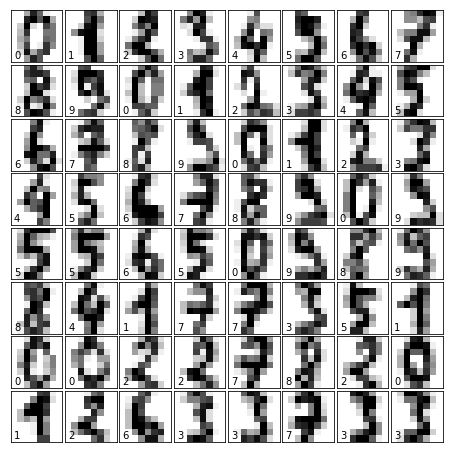

In [27]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

# 3) Estimators seen in class

## Using KNeighborsClassifier Estimator with StratifiedShuffleSplit

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds.
The folds are made by preserving the percentage of samples for each class. Contrary to other cross-validation strategies, random splits do not guarantee that all folds will be different, although this is still very likely for sizeable datasets. 

The classifier estimator chosen is the most simple of all, this classifier implementing the k-nearest neighbors vote. This is called KNeighborsClassifier.


In [28]:
X=digits.data
y=digits.target

Failures = []

# We create both instances.

digitStratified = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=32)

EstimatorKNN = KNeighborsClassifier(n_neighbors=5)

# We applicated split method.

for train_index, test_index in digitStratified.split(X, y):
       
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]    

        # Now, we have dataset prepared to fit and predict it. For this, we used fit and predict methods.
        EstimatorKNN.fit(X_train, y_train)
        Y_prediction =EstimatorKNN.predict(X_test)

        # We calculate number of failures.
        Failures.append(sum(Y_prediction != y_test))


# Afterthat, We calculate The score.

score_test = EstimatorKNN.score(X_test,y_test)
score_train = EstimatorKNN.score(X_train,y_train)

print('score_train: ', score_train)
print('score_test: ', score_test)

# We could also use metric function.

accs = accuracy_score (Y_prediction, y_test)

print("Accuracy_score:" , accs,'\n')

# Finally, we show several results such as:

print("Num. medio de errores de: "  + str(100*np.mean(Failures)/len(y_test)))    
print("Dev. Std. de errores de: " + str(100*np.std(Failures)/len(y_test))) 
print("Failures: ",Failures,'\n')
print("DigitStratified instance: ", digitStratified, '\n')    
print("n_splits: ",digitStratified.get_n_splits(X,y), '\n')

score_train:  0.992840095465
score_test:  0.981481481481
Accuracy_score: 0.981481481481 

Num. medio de errores de: 1.97530864198
Dev. Std. de errores de: 0.17459426696
Failures:  [12, 10, 10] 

DigitStratified instance:  StratifiedShuffleSplit(n_splits=3, random_state=32, test_size=0.3,
            train_size=None) 

n_splits:  3 



##  Learning Curves KNeighborsClassifier Estimator with StratifiedShuffleSplit

Now, we are going to analyze the model above with Graphing Learning Curves. It shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.


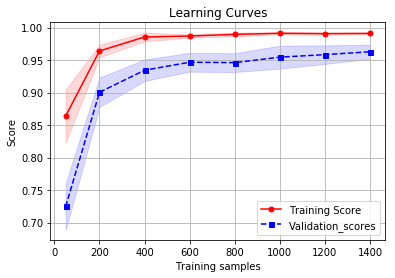

Training samples:  [  50  200  400  600  800 1000 1200 1400]
Training_Scores:  [ 0.864       0.964       0.9855      0.987       0.9895      0.9912
  0.99066667  0.991     ]
Validation_scores:  [ 0.72482896  0.900468    0.93440351  0.94664318  0.94609243  0.95448494
  0.95835726  0.96278991]


In [29]:
EstimatorKNN = KNeighborsClassifier(n_neighbors=5)

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    EstimatorKNN,  X ,  y ,shuffle = True, random_state = 32,  train_sizes = [50,200,400,600,800,1000,1200,1400],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean_SSS = np.mean(valid_scores, axis=1)
valid_std_SSS = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, valid_mean_SSS, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_scores')
plt.fill_between(train_sizes, valid_mean_SSS + valid_std_SSS, 
                 valid_mean_SSS - valid_std_SSS, alpha=0.15, color='b')

plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()

print('Training samples: ' ,train_sizes)
print('Training_Scores: ',train_mean)
print('Validation_scores: ',valid_mean_SSS)

In this case, we can see that adding more training samples will most likely increase generalization and therefore the score. Furthermore, we can observe a decrease in the variance when we increase the training samples. Therefore We can conclude saying that this model has low bias and small variance. Besides you notice that such training score as validation score is very close each other, then we could think that validation score is close to his upper limit (Bayes error rate). The model works well, nevertheless, we are going to test other estimators.

Note: Bayes error rate is the lowest possible error rate for any classifier and is analogous to the irreducible error.


In [30]:
# Other types of metrics score: 
# Note: average = 'micro' Calculate metrics globally by counting the total true positives, false negatives and false positives.

print('precision_score: ', precision_score(y_test, Y_prediction, average='micro'))
print('recall_score: ', recall_score(y_test, Y_prediction, average='micro'))

precision_score:  0.981481481481
recall_score:  0.981481481481


#### About Metrics score above:

Precision_score: The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

Recall_score: The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

## Using KNeighborsClassifier Estimator with cross_val_score

By partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets. A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV.

In [31]:
X=digits.data
y=digits.target

# Classifier implementing the k-nearest neighbors vote and evaluate a score by cross-validation. You can see that we introduce
# the estimatorKNN as a parameter into cross-validation instance.

EstimatorKNN = KNeighborsClassifier()
CVS_EstimatorKNN= cross_val_score(EstimatorKNN,X,y,cv=10)

# Printing the results:

print('cv scores: ', CVS_EstimatorKNN)

# Now, we calculate the mean of cv scores, and this will be our outcome:

print('Mean: ',np.mean(CVS_EstimatorKNN)) 
print('Std: ',np.std(CVS_EstimatorKNN)) 
print('nº cv: ',CVS_EstimatorKNN.size)



cv scores:  [ 0.92972973  0.98907104  0.97790055  0.97777778  0.96648045  0.98324022
  0.98882682  0.98314607  0.97740113  0.96590909]
Mean:  0.973948287255
Std:  0.0165496015374
nº cv:  10


## Graphic adjustment by K-neighbors

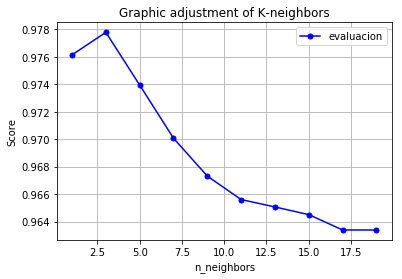

In [32]:
# Graphic adjustment of K-neighbors. We use this graph to see where KNeighborsClassifier works better
# for a give number of n_neighbors.

eval_prec_mean =[]
eval_prec_std = []

max_deep_list = list(range(1,20,2))

for deep in max_deep_list:
    EstimatorKNN = KNeighborsClassifier(n_neighbors=deep)
    CVS_EstimatorKNN = cross_val_score(EstimatorKNN,X,y,cv=10)
    eval_prec_mean.append(np.mean(CVS_EstimatorKNN))
    eval_prec_std.append(np.std(CVS_EstimatorKNN))
    
plt.plot(max_deep_list, eval_prec_mean, color='b', marker='o', markersize=5, label='evaluacion')
plt.title('Graphic adjustment of K-neighbors')
plt.legend()
plt.ylabel('Score')
plt.xlabel('n_neighbors')
plt.grid()
plt.show()

This graph shows us the Score as a function of the number of n_eighbors. We can see that with n_neighbors = 3,
we get higher score value.

## 6) Task: Using KNeighborsClassifier Estimator (weights) with GridSearchCV

Grid searchCV is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. Algorithm parameter tuning is an important step for improving algorithm performance right before presenting results or preparing a system for production.


In [33]:
X=digits.data
y=digits.target

# First of all, we are going to create Split arrays into random train and test subsets with StratifiedShuffleSplit.

digitStratified = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=32)

for train_index, test_index in digitStratified.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]    

# We create a instance of model.
        
EstimatorKNN = KNeighborsClassifier()

# Now, We create a Grid of parameters with a discrete number of values for each. 

param_grid = {'n_neighbors': [3,5,7,9,11,13,15],'weights':['uniform','distance']}

# we put the param_grid into GridSearchCV and fit it. Notice that the GridSearchCV instance when “fitting” it, all 
# the possible combinations of parameter values are evaluated and the best combination is retained.
# Note: If the estimator is a classifier and y is either multiclass, StratifiedKFold is used.

Grid_S_CV= GridSearchCV(EstimatorKNN,param_grid,cv=10)
Grid_S_CV.fit(X_train,y_train)

# Once it has been fitted, we get several parameters.

print("ParameterGrid: ",'\n',list(ParameterGrid(param_grid)),'\n')
print("Best estimator: " , Grid_S_CV.best_estimator_,'\n')
print("Best Score: ",Grid_S_CV.best_score_)
print("Best Parameters ",Grid_S_CV.best_params_)
print("Classes ",Grid_S_CV.classes_,'\n')

# Now, we came back fit it Best_Grid_estimator with.

Best_Grid_estimator = Grid_S_CV.best_estimator_
Best_Grid_estimator.fit(X_train,y_train)

# We use best_estimator attribute and predict method to predict test data.

y_pred = Best_Grid_estimator.predict(X_test)
acc_score = accuracy_score (y_pred, y_test)

# We can use different ways to calculate the accuracy.

print("score_test: " + str(1-(sum(y_test != y_pred)/len(y_test))))
print('score_test: ',Best_Grid_estimator.score(X_test,y_test))
print('accuracy_score: ',acc_score,'\n')

ParameterGrid:  
 [{'n_neighbors': 3, 'weights': 'uniform'}, {'n_neighbors': 3, 'weights': 'distance'}, {'n_neighbors': 5, 'weights': 'uniform'}, {'n_neighbors': 5, 'weights': 'distance'}, {'n_neighbors': 7, 'weights': 'uniform'}, {'n_neighbors': 7, 'weights': 'distance'}, {'n_neighbors': 9, 'weights': 'uniform'}, {'n_neighbors': 9, 'weights': 'distance'}, {'n_neighbors': 11, 'weights': 'uniform'}, {'n_neighbors': 11, 'weights': 'distance'}, {'n_neighbors': 13, 'weights': 'uniform'}, {'n_neighbors': 13, 'weights': 'distance'}, {'n_neighbors': 15, 'weights': 'uniform'}, {'n_neighbors': 15, 'weights': 'distance'}] 

Best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform') 

Best Score:  0.985386221294
Best Parameters  {'n_neighbors': 3, 'weights': 'uniform'}
Classes  [0 1 2 3 4 5 6 7 8 9] 

score_test: 0.991666666667
score_test:  0.991666666667
accuracy_score:  0.99

##  Learning Curves KNeighborsClassifier Estimator with GridSearchCV

Now, we are going to analyze the model above with Graphing Learning Curves. It shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.


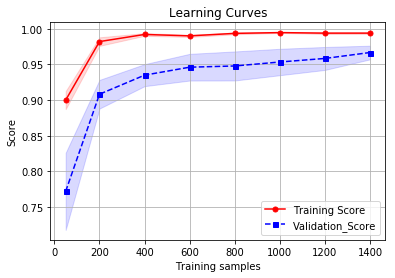

Training samples:  [  50  200  400  600  800 1000 1200 1400]
Train_Scores:  [ 0.9         0.982       0.992       0.99        0.9935      0.9946
  0.99383333  0.99385714]
Valid_scores:  [ 0.77215127  0.90824668  0.93497262  0.94611685  0.94783028  0.95339573
  0.95837921  0.96667773]


In [34]:
Best_Grid_estimator_LC = Best_Grid_estimator

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    Best_Grid_estimator_LC,  X ,  y ,shuffle = True, random_state = 32,  
    train_sizes = [50,200,400,600,800,1000,1200,1400],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean_GS = np.mean(valid_scores, axis=1)
valid_std_GS = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, valid_mean_GS, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_Score')
plt.fill_between(train_sizes, valid_mean_GS + valid_std_GS, 
                 valid_mean_GS - valid_std_GS, alpha=0.15, color='b')

plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()


print('Training samples: ' ,train_sizes)
print('Train_Scores: ',train_mean)
print('Valid_scores: ',valid_mean_GS)

This has a perfomance and score alike learning curve above. However, we'll try others estimators.

In [35]:
# Amount Failures:

y_pred = Best_Grid_estimator.predict(X_test)
print(sum(y_test != y_pred))


3


In [36]:
# Classification_report:

print('classification_report: ','\n','\n',classification_report(y_test, y_pred))

classification_report:  
 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        36
          1       0.95      1.00      0.97        36
          2       1.00      1.00      1.00        35
          3       1.00      1.00      1.00        37
          4       1.00      1.00      1.00        36
          5       1.00      0.97      0.99        37
          6       1.00      1.00      1.00        36
          7       1.00      1.00      1.00        36
          8       1.00      0.97      0.99        35
          9       0.97      0.97      0.97        36

avg / total       0.99      0.99      0.99       360



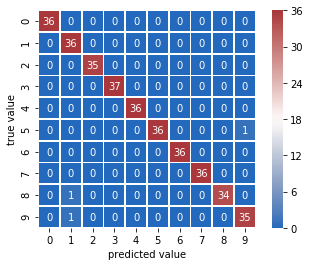

In [37]:
# Confusion Matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, cmap="vlag", robust=True,linewidths=.75, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

With the Confusion Matrix, we can deepen in detail and we see how is the performance for each class (apart from the precision_score and recall_score metrics). We can see that the worst performance belongs to 5,8 y 9 class with 1 failure for each.

## Using decomposition PCA

PCA (Principal component analysis) is a fast and flexible unsupervised method for dimensionality reduction in data, but it can also be useful as a tool for visualization, for noise filtering, or for feature extraction.

In [38]:
X=digits.data
y=digits.target

# project from 64 to 2 dimensions, fit the model with X and apply the dimensionality reduction on X.

pca = PCA(2) 
projected = pca.fit_transform(X)

# Printing shape.

print(X.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


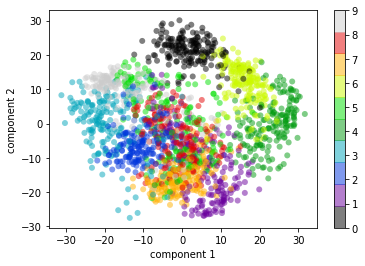

In [39]:
# Plotting components.

plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

We must do some considerations (components mean): The full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.

In [40]:
# PCA components: Principal axes in feature space, representing the directions of maximum variance in the data. 
# The components are sorted by explained_variance_.

print('PCA_components: ',pca.components_,'\n')

# Explained_variance: The amount of variance explained by each of the selected components.

print('explained_variance: ',pca.explained_variance_)

PCA_components:  [[ -3.28471662e-18  -1.73094702e-02  -2.23428861e-01  -1.35913282e-01
   -3.30323012e-02  -9.66341005e-02  -8.32944006e-03   2.26900281e-03
   -3.20516573e-04  -1.19308924e-01  -2.44451680e-01   1.48512774e-01
   -4.67319415e-02  -2.17740744e-01  -1.48136729e-02   4.47779726e-03
   -4.94136001e-05  -7.95419556e-02   8.33951384e-02   2.15915354e-01
   -1.72126816e-01  -1.63712099e-01   2.86444528e-02   4.23251898e-03
    9.85488858e-05   6.42319043e-02   2.54093293e-01  -3.56770906e-02
   -2.09462574e-01  -4.31311579e-02   5.13118720e-02   2.13422772e-04
    0.00000000e+00   1.59950872e-01   3.68690759e-01   1.64406833e-01
    8.52007842e-02   3.72982766e-02   2.15867031e-02   0.00000000e+00
    1.28865563e-03   1.06945273e-01   3.03067446e-01   2.47813020e-01
    2.09637277e-01   1.22325137e-02  -3.69458399e-02   1.61485071e-03
    6.93023486e-04  -8.35144849e-03  -5.58599116e-02   9.30534266e-02
    1.07387719e-01  -1.37734570e-01  -6.32879551e-02   9.61671161e-04
   

#### Choosing the number of components

Using PCA you can also estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

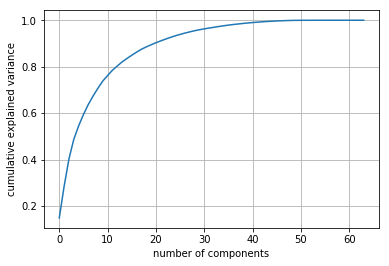

In [41]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid();

We can see that with the first 10 components contain approximately 75% of the cumulative explained variance, while you need around 50 components to describe close to 100% of the cumulative explained variance. Furthermore, we see that our two-dimensional projection loses a lot of information and that we'd need about 20 components to retain 90% of the cumulative explained variance.


## Using SVC Model

Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression. we are going to use a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness), gamma (which controls the size of the radial basis function kernel), and kernel to determine the best model:

In [42]:
X=digits.data
y=digits.target

# First of all, we are going to create Split arrays into random train and test subsets with StratifiedShuffleSplit.

digitStratified = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=32)

for train_index, test_index in digitStratified.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]    

# We create a instance of model.
        
Estimator_SVC =  SVC () 

# Now, we are going to use a grid search cross-validation to explore combinations of parameters.

param_grid = {'C':[1, 5, 10, 50], 'gamma':[0.0001, 0.0005, 0.001, 0.005], 'kernel':['linear', 'rbf', 'sigmoid']}

Grid_S_CV= GridSearchCV(Estimator_SVC,param_grid,cv=5)
Grid_S_CV.fit(X_train,y_train)

# Once it has been fitted, we get several parameters.

print("ParameterGrid: ",'\n',list(ParameterGrid(param_grid)),'\n')
print("Best estimator: " , Grid_S_CV.best_estimator_,'\n')
print("Best Score: ",Grid_S_CV.best_score_)
print("Best Parameters ",Grid_S_CV.best_params_)
print("Classes ",Grid_S_CV.classes_,'\n')

# Now, we came back fit it Best_Grid_estimator with.

Best_Grid_estimator_SVC = Grid_S_CV.best_estimator_
Best_Grid_estimator_SVC.fit(X_train,y_train)

# We use best_estimator attribute and predict method to predict test data.

y_pred = Best_Grid_estimator_SVC.predict(X_test)
acc_score = accuracy_score (y_pred, y_test)

# We can use different ways to calculate the score or accuracy.

print("score_test: " + str(1-(sum(y_test != y_pred)/len(y_test))))
print('score_test: ',Best_Grid_estimator_SVC.score(X_test,y_test))
print('accuracy_score: ',acc_score,'\n')

print('precision_score: ', precision_score(y_test, y_pred, average='micro'))
print('recall_score: ', recall_score(y_test, y_pred, average='micro'))

ParameterGrid:  
 [{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'sigmoid'}, {'C': 1, 'gamma': 0.0005, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.0005, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.0005, 'kernel': 'sigmoid'}, {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}, {'C': 1, 'gamma': 0.005, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.005, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.005, 'kernel': 'sigmoid'}, {'C': 5, 'gamma': 0.0001, 'kernel': 'linear'}, {'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 5, 'gamma': 0.0001, 'kernel': 'sigmoid'}, {'C': 5, 'gamma': 0.0005, 'kernel': 'linear'}, {'C': 5, 'gamma': 0.0005, 'kernel': 'rbf'}, {'C': 5, 'gamma': 0.0005, 'kernel': 'sigmoid'}, {'C': 5, 'gamma': 0.001, 'kernel': 'linear'}, {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 5, 'gamma': 0.001, 'kernel': 'sigmoid'}, {'C': 5, 'gamma':

##  Learning Curves Support vector machines (SVMs) Estimator with GridSearchCV
Now, we are going to analyze the model above with Graphing Learning Curves. It shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

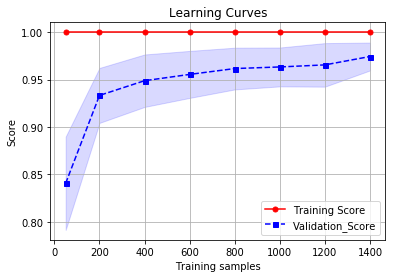

Training samples:  [  50  200  400  600  800 1000 1200 1400]
Train_Scores:  [ 1.  1.  1.  1.  1.  1.  1.  1.]
Valid_scores:  [ 0.84055891  0.93330843  0.9488425   0.9554896   0.96166471  0.96335789
  0.96553257  0.97438952]


In [43]:
Best_Grid_estimator_LC = Best_Grid_estimator_SVC

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    Best_Grid_estimator_LC,  X ,  y ,shuffle = True, random_state = 32,  
    train_sizes = [50,200,400,600,800,1000,1200,1400],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean_SVC = np.mean(valid_scores, axis=1)
valid_std_SVC = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, valid_mean_SVC, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_Score')
plt.fill_between(train_sizes, valid_mean_SVC + valid_std_SVC, 
                 valid_mean_SVC - valid_std_SVC, alpha=0.15, color='b')

plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()


print('Training samples: ' ,train_sizes)
print('Train_Scores: ',train_mean)
print('Valid_scores: ',valid_mean_SVC)

We can see that adding more samples increase the score. (We must train more sample)

In [44]:
# Classification_report:

print('classification_report: ','\n','\n',classification_report(y_test, y_pred))

classification_report:  
 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        36
          1       0.97      1.00      0.99        36
          2       1.00      1.00      1.00        35
          3       1.00      0.97      0.99        37
          4       1.00      0.97      0.99        36
          5       0.97      0.97      0.97        37
          6       1.00      1.00      1.00        36
          7       1.00      1.00      1.00        36
          8       1.00      1.00      1.00        35
          9       0.97      1.00      0.99        36

avg / total       0.99      0.99      0.99       360



In [45]:
# Amount Failures:

y_pred = Best_Grid_estimator_SVC.predict(X_test)
print(sum(y_test != y_pred))


3


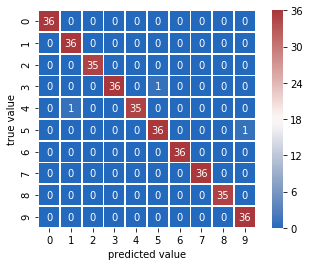

In [49]:
# Confusion Matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, cmap="vlag", robust=True,linewidths=.75, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

### 5) Task: Razona si es necesario estratificar el proceso de cross-validación analizando la distribución de muestras por clase.

To analyze if our data have to be stratified, we’ll use the absolute frequency and the number of classes (For this case, we have ten classes from 0 to 9).

We have created several graphics. One of them, it’s a bar graph where you can see absolute frequency by each class. And others show us absolute frequency as a function of the number of samples of the dataset for each class.

As you can observe for each class, the distribution of absolute frequency is uniform and proportional to the number of samples of the dataset. We have plotted every class separately to be confident that no class need to be stratified. Consequently, we can conclude that we don't need to stratify the data.

Another important question that we must know when we work with models of classification is if our dataset is balanced or not. We can say that a dataset isn’t balanced when the number of observations isn’t the same for each class or when the difference between the number of observations of the class is high.

To know if our dataset is balanced or not. We look at the bar chart, and we observe that absolute frequency for each class is almost the same. Therefore, We can conclude that our dataset is balanced.

You can see all this below.



Absolute frequency: [178 182 177 183 181 182 181 179 174 180]
Types of Classes:  [0 1 2 3 4 5 6 7 8 9]


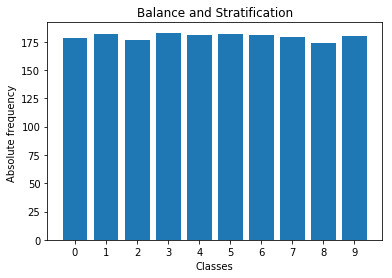

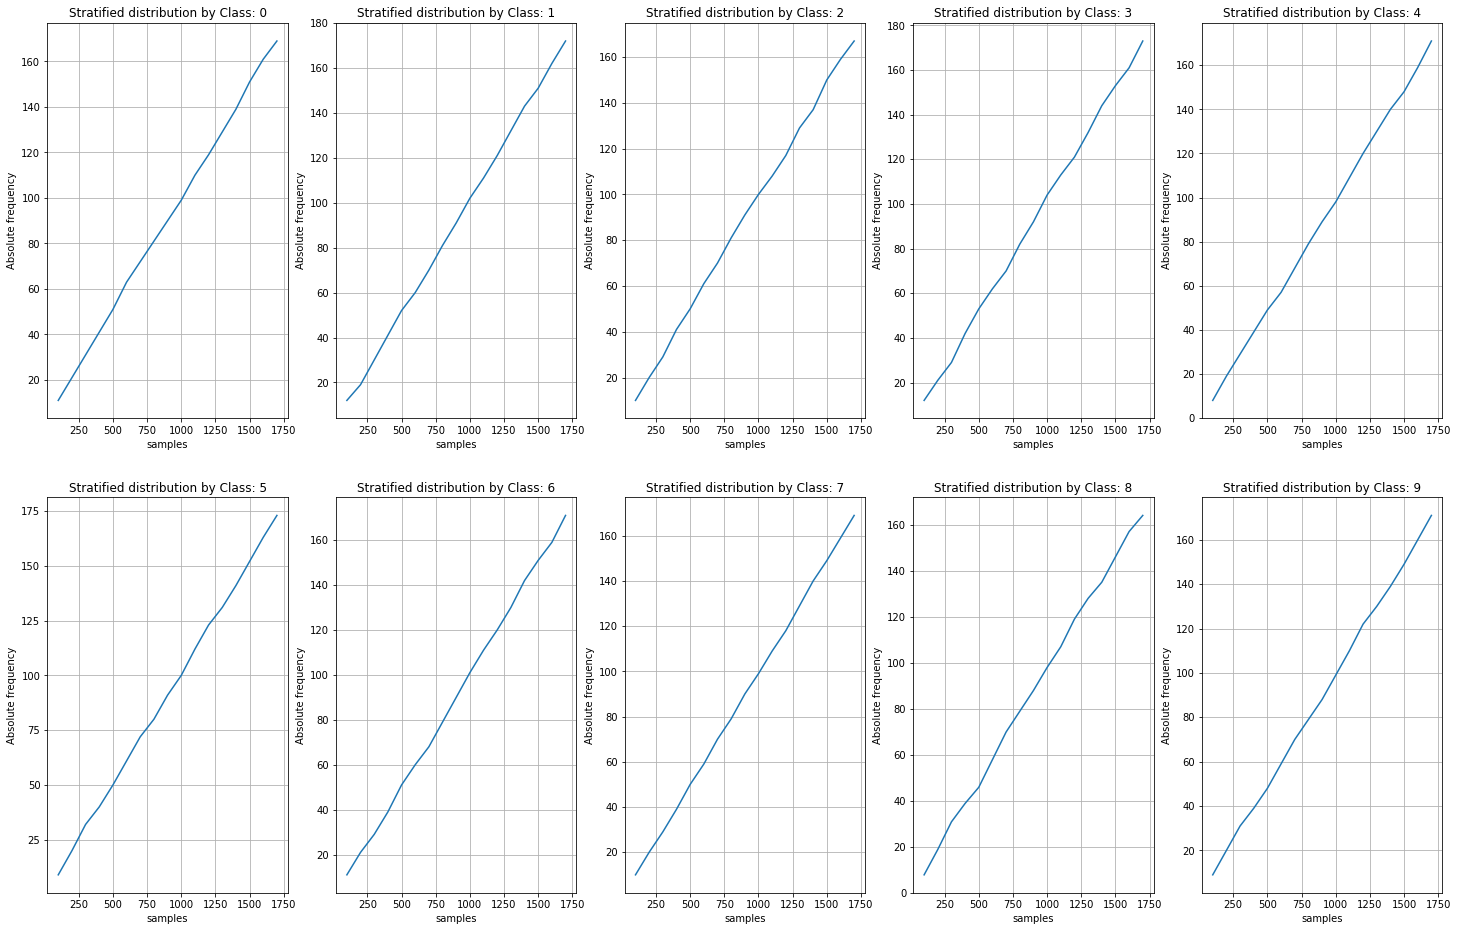

Columns of absolute frecuency by classes and by samples:  
 [[ 11  12  10  12   8   9  11  10   8   9]
 [ 21  19  20  21  19  20  21  20  19  20]
 [ 31  30  29  29  29  32  29  29  31  31]
 [ 41  41  41  42  39  40  39  39  39  39]
 [ 51  52  50  53  49  50  51  50  46  48]
 [ 63  60  61  62  57  61  60  59  58  59]
 [ 72  70  70  70  68  72  68  70  70  70]
 [ 81  81  81  82  79  80  79  79  79  79]
 [ 90  91  91  92  89  91  90  90  88  88]
 [ 99 102 100 104  98 100 101  99  98  99]
 [110 111 108 113 109 112 111 109 107 110]
 [119 121 117 121 120 123 120 118 119 122]
 [129 132 129 132 130 131 130 129 128 130]
 [139 143 137 144 140 141 142 140 135 139]
 [151 151 150 153 148 152 151 149 146 149]
 [161 162 159 161 159 163 159 159 157 160]
 [169 172 167 173 171 173 171 169 164 171]]


In [48]:
X=digits.data
y=digits.target

z=[]
h=[]

c=np.bincount(y)  
f=np.arange(100,1797,100)
              
for cont in f:
    b=np.bincount(y[0:cont])
    z.append(np.array(b))
    h.append(np.array(cont)) 
    
g=np.array(z)
k=np.array(h)

'''
print(g[:,0]/k)
print(k)

plt.plot(f,z)
plt.title('Stratified distribution')
plt.xlabel('Samples')
plt.ylabel('Absolute frequency ')
plt.grid()
plt.show()
'''
print('Absolute frequency:',c)
print('Types of Classes: ',digits.target_names)

ind = np.arange(10)

plt.bar(ind,c)
#plt.axis([-1,10,0,190])
plt.xticks(ind, ('0','1','2','3','4','5','6', '7','8','9'))
plt.title('Balance and Stratification')
plt.xlabel('Classes')
plt.ylabel('Absolute frequency ')
plt.show()

fig, axs = plt.subplots(2, 5, figsize=(25, 16))

number=-1

for m in range(2):
 
    for n in range(5):
        
        number =number+1
        b=(g[:,number])
        axs[m, n].plot(f,b)
        axs[m, n].set_title('Stratified distribution by Class: ' + str(number))
        axs[m, n].set_xlabel('samples')
        axs[m, n].set_ylabel('Absolute frequency')
        axs[m, n].grid()
        
plt.show()


print('Columns of absolute frecuency by classes and by samples: ','\n',g)

### 7) Task : Siguiendo la misma aproximación del último apartado, introduce el tipo de métrica de distancia (parámetro “metric”) dentro del proceso de validación cruzada. Evalúa los resultados y las ganancias/pérdidas de capacidad de generalización del modelo.

In [50]:
X=digits.data
y=digits.target

# First of all, we are going to create Split arrays into random train and test subsets with StratifiedShuffleSplit.

digitStratified = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=32)

for train_index, test_index in digitStratified.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]    

# We create a instance of model.
        
EstimatorKNN = KNeighborsClassifier()

# Now, We create a Grid of parameters with a discrete number of values for each. Now, we included 'metric' in param_grid.

param_grid = {'n_neighbors': [3,5,7,9,11,13,15],'weights':['uniform','distance'],'metric': ['manhattan','chebyshev','minkowski'],
             'p':[3,5]}

# we put the param_grid into GridSearchCV and fit it. Notice that the GridSearchCV instance when “fitting” it, all 
# the possible combinations of parameter values are evaluated and the best combination is retained.
# Note: If the estimator is a classifier and y is either multiclass, StratifiedKFold is used.

Grid_S_CV= GridSearchCV(EstimatorKNN,param_grid,cv=10)
Grid_S_CV.fit(X_train,y_train)

# Once it has been fitted, we get several parameters.

print("Best estimator: " , Grid_S_CV.best_estimator_,'\n')
print("Best Score: ",Grid_S_CV.best_score_)
print("Best Parameters ",Grid_S_CV.best_params_)
print("Classes ",Grid_S_CV.classes_,'\n')

# Now, we came back fit it Best_Grid_estimator with.

Best_Grid_estimator_Metrics = Grid_S_CV.best_estimator_
Best_Grid_estimator_Metrics.fit(X_train,y_train)

# We use best_estimator attribute and predict method to predict test data.

y_pred = Best_Grid_estimator_Metrics.predict(X_test)
acc_score = accuracy_score (y_pred, y_test)

# We can use different ways to calculate the score or accuracy.

print("score_test: " + str(1-(sum(y_test != y_pred)/len(y_test))))
print('score_test: ',Best_Grid_estimator_Metrics.score(X_test,y_test))
print('accuracy_score: ',acc_score,'\n')

# Lastly, Build a text report showing the main classification metrics.

print('precision_score: ', precision_score(y_test, y_pred, average='micro'))
print('recall_score: ', recall_score(y_test, y_pred, average='micro'))

Best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='distance') 

Best Score:  0.987271280827
Best Parameters  {'metric': 'minkowski', 'n_neighbors': 3, 'p': 3, 'weights': 'distance'}
Classes  [0 1 2 3 4 5 6 7 8 9] 

score_test: 0.983333333333
score_test:  0.983333333333
accuracy_score:  0.983333333333 

precision_score:  0.983333333333
recall_score:  0.983333333333


### Learning Curve KNeighborsClassifier Estimator (weights-Metrics) with GridSearchCV 

Now, we are going to analyze the model above with Graphing Learning Curves. It shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

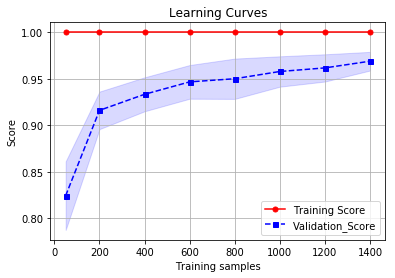

Training samples:  [  50  200  400  600  800 1000 1200 1400]
Train_Scores:  [ 1.  1.  1.  1.  1.  1.  1.  1.]
Valid_scores:  [ 0.82440991  0.91606525  0.93331817  0.94667408  0.95003395  0.95782951
  0.96168628  0.96888286]


In [51]:
Best_Grid_estimator_LC_M = Best_Grid_estimator_Metrics

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    Best_Grid_estimator_LC_M,  X ,  y ,shuffle = True, random_state = 32,  
    train_sizes = [50,200,400,600,800,1000,1200,1400],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, valid_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_Score')
plt.fill_between(train_sizes, valid_mean + valid_std, 
                 valid_mean - valid_std, alpha=0.15, color='b')

plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()


print('Training samples: ' ,train_sizes)
print('Train_Scores: ',train_mean)
print('Valid_scores: ',valid_mean)

We can see that adding more samples increase the score. (We must train more sample)

In [52]:
# Classification_report:

print('classification_report: ','\n','\n',classification_report(y_test, y_pred))

classification_report:  
 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        54
          1       0.95      0.98      0.96        55
          2       1.00      1.00      1.00        53
          3       1.00      0.98      0.99        55
          4       1.00      1.00      1.00        54
          5       0.95      0.96      0.95        55
          6       1.00      1.00      1.00        54
          7       0.98      1.00      0.99        54
          8       1.00      0.96      0.98        52
          9       0.96      0.94      0.95        54

avg / total       0.98      0.98      0.98       540



In [53]:
# Amount Failures:

y_pred = Best_Grid_estimator_Metrics.predict(X_test)
print(sum(y_test != y_pred))


9


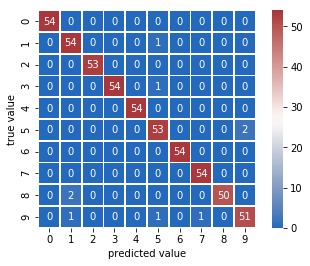

In [54]:
# Confusion Matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, cmap="vlag", robust=True,linewidths=.75, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

# Comparative analysis between classifiers

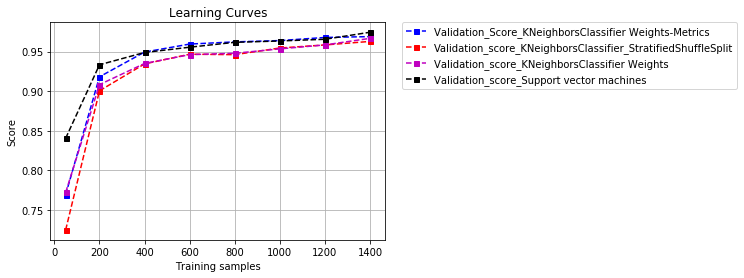

In [55]:
Best_Grid_estimator_LC_M = Best_Grid_estimator_Metrics

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    Best_Grid_estimator_LC_M,  X ,  y ,shuffle = True, random_state = 456,  
    train_sizes = [50,200,400,600,800,1000,1200,1400],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, valid_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_Score_KNeighborsClassifier Weights-Metrics')
#plt.fill_between(train_sizes, valid_mean + valid_std, 
                 #valid_mean - valid_std, alpha=0.15, color='b')

plt.plot(train_sizes, valid_mean_SSS, color='r', linestyle='--', 
         marker='s', markersize=5, label='Validation_score_KNeighborsClassifier_StratifiedShuffleSplit')
#plt.fill_between(train_sizes, valid_mean_SSS + valid_std_SSS, 
                 #valid_mean_SSS - valid_std_SSS, alpha=0.15, color='b')

plt.plot(train_sizes, valid_mean_GS, color='m', linestyle='--', 
         marker='s', markersize=5, label='Validation_score_KNeighborsClassifier Weights')
#plt.fill_between(train_sizes, valid_mean_GS + valid_std_GS, 
                #valid_mean_GS - valid_std_GS, alpha=0.15, color='b')

plt.plot(train_sizes, valid_mean_SVC, color='k', linestyle='--', 
         marker='s', markersize=5, label='Validation_score_Support vector machines')
#plt.fill_between(train_sizes, valid_mean_SVC + valid_std_SVC, 
                 #valid_mean_SVC - valid_std_SVC, alpha=0.15, color='b')

plt.title('Learning Curves')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()


## Final conclusion:

We can see learning curve alike between them and high score too. The best model is SVM. The models generalised the data and work very well. we have good attributes. Maybe, we could try to others algorithms and add more data but improving the model.

# Model persistence
Fynally, It is possible to save a model in the scikit by using Python’s built-in persistence model:

Example: joblib.dump(EstimatorKNN, 'TaskModule8.pkl') 

Later you can load back the pickled model (possibly in another Python process) with:  

Example: joblib.load('TaskModule8.pkl') 